# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về [bệnh tiểu đường](https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906)

## I. Thống kê mô tả:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## II. Trực quan hóa dữ liệu:

### 1. Biểu đồ phân phối Outcome (0: không, 1: có tiểu đường):

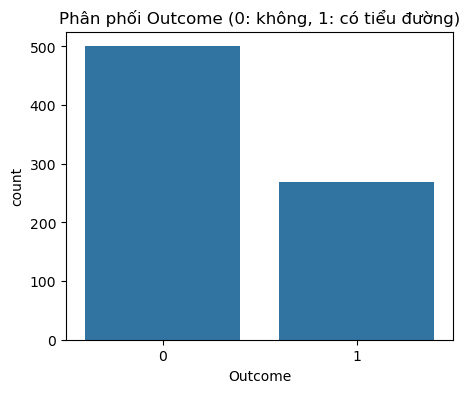

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Outcome")
plt.title("Phân phối Outcome (0: không, 1: có tiểu đường)")
plt.show()

**Nhận xét**
- Biểu đồ cho thấy số lượng người không mắc bệnh tiểu đường (**Outcome = 0**) nhiều hơn so với số người mắc bệnh (**Outcome = 1**) trong tập dữ liệu.
- Tỷ lệ người mắc bệnh tiểu đường thấp hơn rõ rệt so với người không mắc bệnh.
- Sự chênh lệch này cho thấy dữ liệu bị mất cân bằng nhãn, cần lưu ý khi xây dựng mô hình dự đoán để tránh hiện tượng mô hình thiên vị về nhóm đa số.

### 2. Biểu đồ phân phối Glucose theo Outcome:

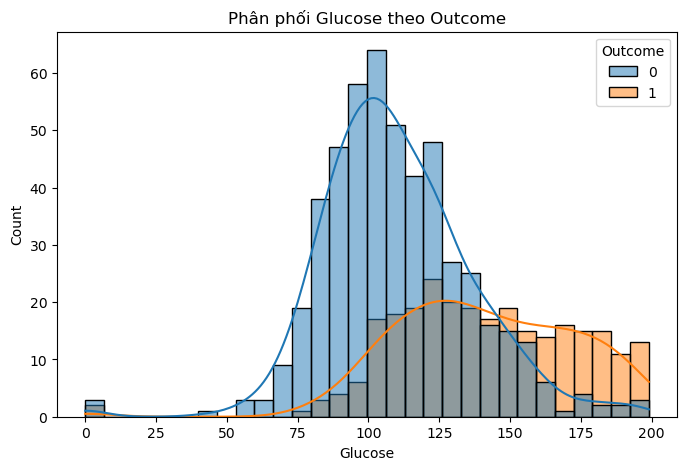

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose", hue="Outcome", kde=True, bins=30)
plt.title("Phân phối Glucose theo Outcome")
plt.show()

**Nhận xét**
- Biểu đồ cho thấy sự khác biệt rõ rệt về giá trị **Glucose** giữa hai nhóm **Outcome**.
- Người mắc bệnh tiểu đường (**Outcome = 1**) thường có giá trị **Glucose** cao hơn so với người không mắc bệnh (**Outcome = 0**).
- Phân phối **Glucose** của nhóm mắc bệnh bị lệch phải, tập trung nhiều ở các giá trị lớn.
- Điều này cho thấy **Glucose** là một đặc trưng quan trọng giúp phân biệt giữa người mắc và không mắc bệnh tiểu đường.

### 3. Biểu đồ phân phối BMI theo Outcome (violinplot);

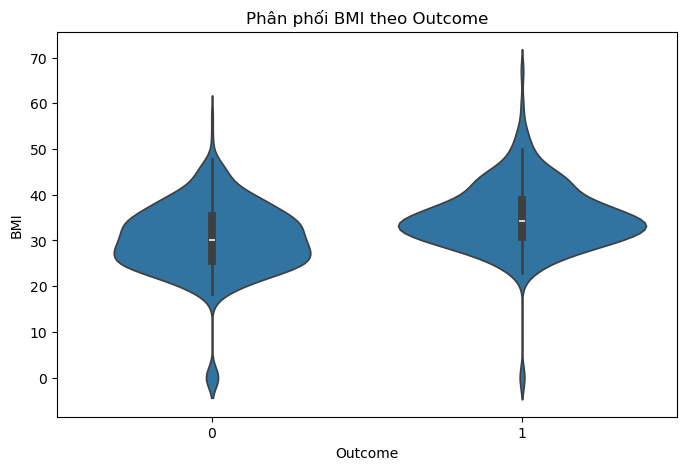

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Outcome", y="BMI")
plt.title("Phân phối BMI theo Outcome")
plt.show()

**Nhận xét**
- Biểu đồ violin cho thấy sự khác biệt về giá trị **BMI** giữa hai nhóm **Outcome**.
- Người mắc bệnh tiểu đường (**Outcome = 1**) thường có giá trị **BMI** cao hơn so với người không mắc bệnh (**Outcome = 0**).
- Phân phối **BMI** của nhóm mắc bệnh tập trung nhiều ở các giá trị lớn hơn, trong khi nhóm không mắc bệnh có xu hướng phân bố ở giá trị thấp hơn.
- Điều này cho thấy **BMI** là một đặc trưng quan trọng giúp phân biệt giữa người mắc và không mắc bệnh tiểu đường.

### 4. Biểu đồ scatterplot: Quan hệ giữa Glucose và BMI theo Outcome:

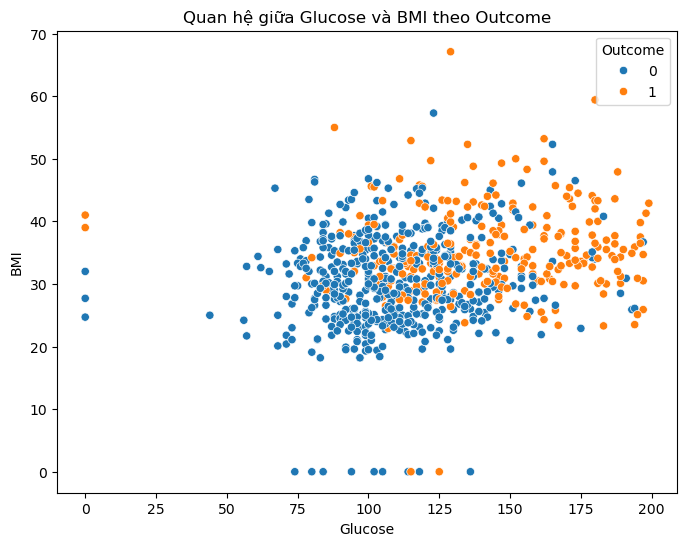

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome")
plt.title("Quan hệ giữa Glucose và BMI theo Outcome")
plt.show()

**Nhận xét**
- Biểu đồ thể hiện mối quan hệ giữa hai biến **Glucose** và **BMI** phân theo nhóm **Outcome** (0: không mắc, 1: mắc tiểu đường).
- Các điểm màu cam (**Outcome = 1**) tập trung nhiều ở vùng có **Glucose** cao và **BMI** lớn.
- Các điểm màu xanh (**Outcome = 0**) chủ yếu xuất hiện ở vùng **Glucose** thấp và **BMI** thấp hơn.
- Có xu hướng: người có **Glucose** và **BMI** cao thì khả năng mắc bệnh tiểu đường cũng cao hơn.
- Biểu đồ cho thấy cả hai biến **Glucose** và **BMI** đều có vai trò quan trọng trong việc phân biệt giữa người mắc và không mắc bệnh tiểu đường.

### 5. Biểu đồ pairplot các biến liên quan đến Outcome:

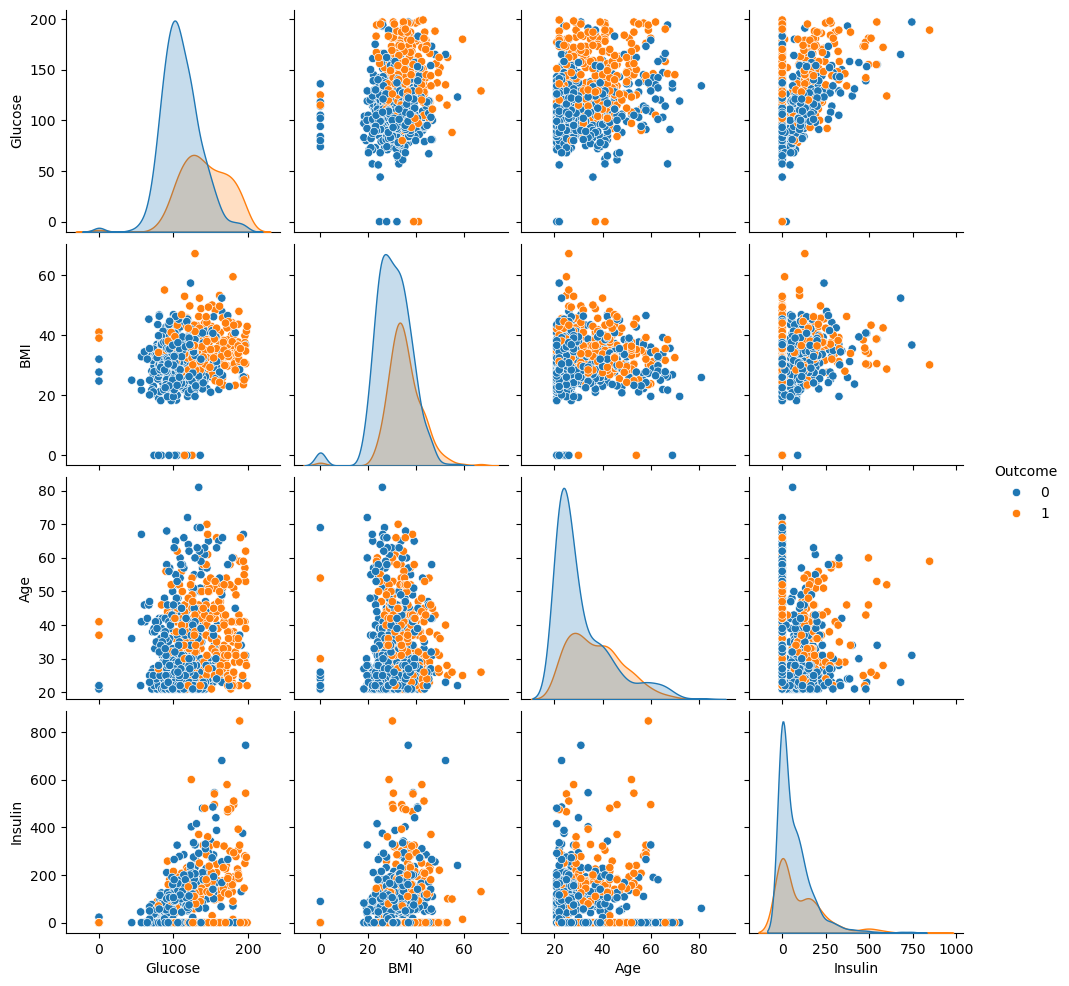

In [9]:
sns.pairplot(df[["Glucose","BMI","Age","Insulin","Outcome"]], hue="Outcome")
plt.show()

**Nhận xét**
- Các biến **Glucose** và **BMI** có sự khác biệt rõ rệt giữa hai nhóm Outcome, nhóm mắc bệnh (**Outcome = 1**) thường có giá trị cao hơn.
- Biến **Age** cho thấy người mắc bệnh tiểu đường có xu hướng lớn tuổi hơn so với nhóm không mắc bệnh.
- Biến **Insulin** có phân phối rộng, nhưng không thể hiện rõ sự khác biệt giữa hai nhóm Outcome.
- Các scatterplot cho thấy mối liên hệ giữa các cặp biến, đặc biệt **Glucose** và **BMI** cùng cao thì khả năng mắc bệnh tiểu đường cũng cao hơn.
- Nhìn chung, **Glucose**, **BMI** và **Age** là các đặc trưng quan trọng giúp phân biệt giữa người mắc và không mắc bệnh tiểu đường.

### 6. Biểu đồ heatmap: Ma trận tương quan giữa các biến:

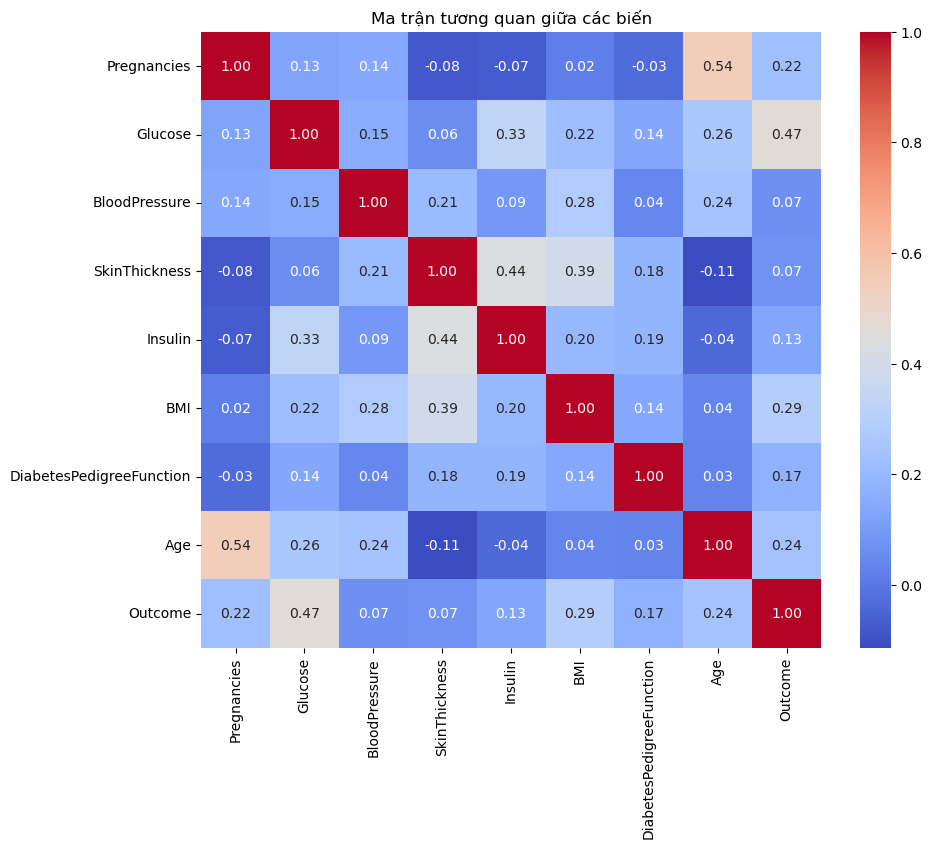

In [10]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

**Nhận xét**
- Biến **Glucose** có tương quan dương mạnh nhất với **Outcome** (0.47), cho thấy người có mức Glucose cao thường dễ mắc bệnh tiểu đường hơn.
- **BMI** và **Age** cũng có tương quan dương với **Outcome** (lần lượt là 0.29 và 0.24), nghĩa là người có chỉ số BMI cao và lớn tuổi có nguy cơ mắc bệnh cao hơn.
- **Pregnancies** có tương quan 0.22 với **Outcome**, cho thấy số lần mang thai cũng có ảnh hưởng nhất định đến nguy cơ mắc bệnh.
- Các biến còn lại như **BloodPressure**, **SkinThickness**, **Insulin**, **DiabetesPedigreeFunction** có tương quan yếu với **Outcome**.
- Ma trận giúp xác định các đặc trưng quan trọng để lựa chọn cho mô hình dự đoán bệnh tiểu đường, nổi bật nhất là **Glucose**, **BMI** và **Age**.

### 7. Biểu đồ phân phối Outcome theo nhóm tuổi:

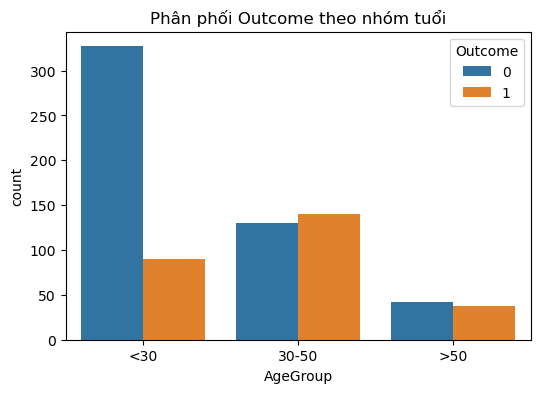

In [11]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,50,80], labels=["<30","30-50",">50"])
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="AgeGroup", hue="Outcome")
plt.title("Phân phối Outcome theo nhóm tuổi")
plt.show()

**Nhận xét**
- Biểu đồ cho thấy tỷ lệ người mắc bệnh tiểu đường (**Outcome = 1**) tăng lên ở nhóm tuổi từ 30-50 so với nhóm dưới 30 tuổi.
- Ở nhóm tuổi **<30**, số người không mắc bệnh (**Outcome = 0**) chiếm đa số.
- Ở nhóm tuổi **30-50**, số người mắc và không mắc bệnh gần như tương đương.
- Ở nhóm tuổi **>50**, số lượng người mắc và không mắc bệnh đều giảm, nhưng tỷ lệ mắc bệnh vẫn cao.
- Điều này cho thấy nguy cơ mắc bệnh tiểu đường tăng lên theo độ tuổi, đặc biệt ở nhóm từ 30 tuổi trở lên.

# Kết thúc